# I am using the ASL MNIST dataset

[link](https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fdatamunge%2Fsign-language-mnist)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from keras.datasets import mnist
import keras as kb

from sklearn.preprocessing import LabelBinarizer

from plotnine import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
import matplotlib.pyplot as plt


In [3]:
!mkdir ~/.kaggle

# move kaggle.json to hidden kaggle folder
!cp kaggle.json ~/.kaggle/

# change permissions on file
!chmod 600 ~/.kaggle/kaggle.json

# download zipped data
!kaggle datasets download -d datamunge/sign-language-mnist


 99% 62.0M/62.6M [00:03<00:00, 28.3MB/s]
100% 62.6M/62.6M [00:03<00:00, 19.8MB/s]


In [4]:
!unzip -qq /content/sign-language-mnist.zip

In [2]:
train_df = pd.read_csv("/Users/kelseyhawkins/Desktop/CPSC_Courses/CPSC_393/sign_mnist_train.csv")
test_df = pd.read_csv("/Users/kelseyhawkins/Desktop/CPSC_Courses/CPSC_393/sign_mnist_test.csv")

In [3]:
# Separating X and Y
y_train = train_df['label']
y_test = test_df['label']

del train_df['label']
del test_df['label']


In [4]:
# rescale data to be 0-1 instead of 0-255
trainX = train_df.astype("float32") / 255.0
testX = test_df.astype("float32") / 255.0

# change the labels to be in the correct format
lb = LabelBinarizer()
trainY = lb.fit_transform(y_train)
testY = lb.transform(y_test)

trainX.head()
trainX.shape

print(trainX.shape,
trainY.shape)

print(testX.shape,
testY.shape)


(27455, 784) (27455, 24)
(7172, 784) (7172, 24)


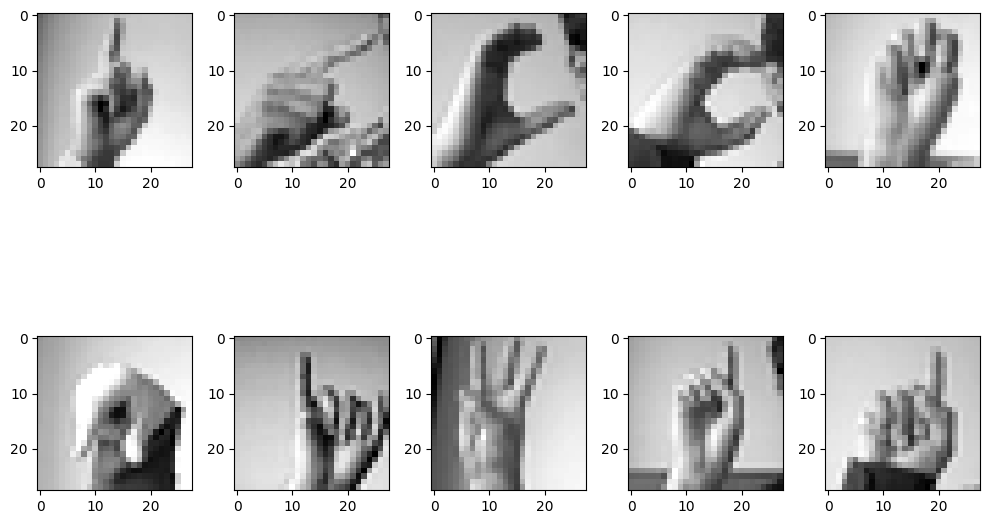

In [5]:
# Visualize some images!!!
import matplotlib.pyplot as plt

# I used different names cuz i wanted to reshape them without
# Changing the original data put into the model :)
x_train = train_df.values
x_test = test_df.values
x_train_vis = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
f, ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train_vis[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()    

Epoch 1/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2440 - loss: 60.6517 - val_accuracy: 0.4908 - val_loss: 4.9615
Epoch 2/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5434 - loss: 3.3808 - val_accuracy: 0.4235 - val_loss: 3.0997
Epoch 3/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6243 - loss: 2.3715 - val_accuracy: 0.4310 - val_loss: 3.0547
Epoch 4/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6679 - loss: 2.2122 - val_accuracy: 0.3859 - val_loss: 3.4815
Epoch 5/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6909 - loss: 2.1028 - val_accuracy: 0.4794 - val_loss: 3.1972
Epoch 6/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7173 - loss: 1.9979 - val_accuracy: 0.5229 - val_loss: 3.1080
Epoch 7/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7448 - loss: 1.8568 - val_accuracy: 0.5612 - val_loss: 2.6255
Epoch 8/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7495 - loss: 1.8184 - val_acc

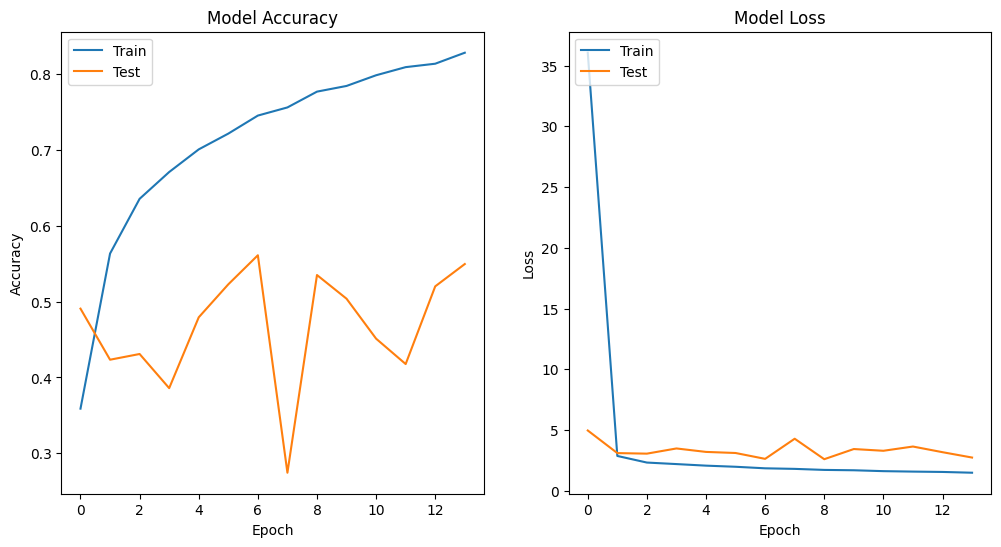

In [7]:
# build structure of the model!! DNN
# The images are naturally 28*28*1 shape, so input will be 784 (columns)
model = kb.Sequential([
    kb.layers.Dense(500, input_shape = [784]), #input
    kb.layers.Dense(300, activation='relu', kernel_regularizer = "l1"),
    kb.layers.BatchNormalization(),
    kb.layers.Dropout(0.2),
    kb.layers.Dense(150, activation='relu', kernel_regularizer = "l1"),
    kb.layers.Dropout(0.2),
    kb.layers.Dense(90, activation='relu'),
    kb.layers.Dropout(0.2),
    kb.layers.Dense(50, activation='relu'),
    kb.layers.BatchNormalization(),
    kb.layers.Dense(24, activation = "softmax") #output
])

# compile model, commenting out the optimizer I dont want (from me testing them out hehe)
# Did the best with SGD!!

model.compile(loss="categorical_crossentropy", optimizer=kb.optimizers.SGD(),
	metrics=["accuracy"])
# 858/858 [==============================] - 10s 11ms/step - loss: 1.6283 - accuracy: 0.7937 - val_loss: 4.3707 - val_accuracy: 0.3483


# model.compile(loss="categorical_crossentropy", optimizer=kb.optimizers.Adam(),
# 	metrics=["accuracy"])
# 858/858 [==============================] - 11s 13ms/step - loss: 2.3044 - accuracy: 0.7480 - val_loss: 5.9815 - val_accuracy: 0.2377


# model.compile(loss="categorical_crossentropy", optimizer=kb.optimizers.RMSprop(),
# 	metrics=["accuracy"])
# 858/858 [==============================] - 10s 12ms/step - loss: 2.3771 - accuracy: 0.7584 - val_loss: 4.9785 - val_accuracy: 0.3296

early = [kb.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5)]

history = model.fit(trainX, trainY, epochs = 100, validation_data=(testX, testY), callbacks = early)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [8]:
key = {0:'a', 1:'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f',
       6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k',
       11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p',
       16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u',
       21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z'
       }

In [10]:
train_pred = model.predict(trainX)
train_pred_labels = np.argmax(train_pred, axis=1)

# Calculate accuracy for the training set
acc_train = accuracy_score(y_train, train_pred_labels)
f1_train = f1_score(y_train, train_pred_labels, average = 'micro')

# For the testing set, do the prediction and then calculate accuracy
test_pred = model.predict(testX)
test_pred_labels = np.argmax(test_pred, axis=1)
acc_test = accuracy_score(y_test, test_pred_labels)
f1_test = f1_score(y_test, test_pred_labels, average = 'micro')

print(f"Training accuracy: {acc_train:.4f}")
print(f"Training F1: {f1_train:.4f}")
print(f"Testing accuracy: {acc_test:.4f}")
print(f"Testing F1: {f1_test:.4f}")


225/225 [==============================] - 0s 522us/step
Training accuracy: 0.3248
Training F1: 0.3248
Testing accuracy: 0.3318
Testing F1: 0.3318


225/225 [==============================] - 0s 568us/step


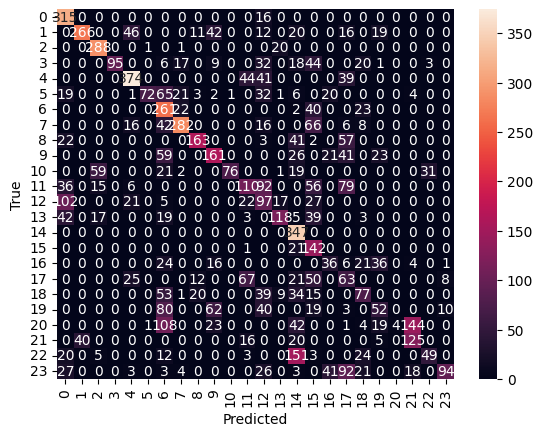

In [11]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

pred_labels = np.argmax(model.predict(testX), axis=-1)
true_labels = np.argmax(testY, axis=-1)

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


225/225 [==============================] - 0s 590us/step


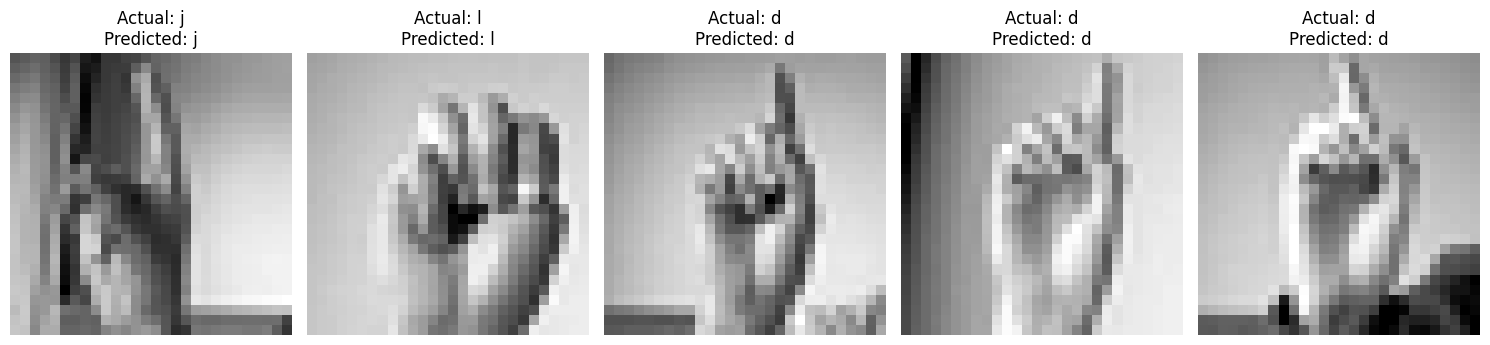

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Predicting on test dataset
test_pred = model.predict(testX)
test_pred_labels = np.argmax(test_pred, axis=1)

# Actual labels in numeric form
true_labels = np.argmax(testY, axis=1)

# Mapping numeric labels back to letters using 'key' dictionary
mapped_true_labels = [key[label] for label in true_labels]
mapped_pred_labels = [key[label] for label in test_pred_labels]

# Select a few random images from the test set to display
num_images = 5
random_indices = np.random.choice(testX.shape[0], num_images, replace=False)

# Setup for a 1x5 grid
fig, axes = plt.subplots(nrows=1, ncols=num_images, figsize=(15, 15))

for ax, idx in zip(axes.flat, random_indices):
    # Reshape the image for display
    image = testX.iloc[idx].values.reshape(28, 28)  # Reshape back to 28x28 for display
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Actual: {mapped_true_labels[idx]}\nPredicted: {mapped_pred_labels[idx]}')
    ax.axis('off')

plt.tight_layout()
plt.show()


# Random Forest Classifier

In [13]:
# A simple RFC for fun!

if len(trainY.shape) > 1:  # trainY is one-hot encoded
    y_train_labels = np.argmax(trainY, axis=1)
    y_test_labels = np.argmax(testY, axis = 1)
else:
    y_train_labels = trainY  # trainY is already in label format
    y_test_labels = testY

rf = RandomForestClassifier(random_state=123)
rf.fit(trainX, y_train_labels)

test_preds = rf.predict(testX)
train_preds = rf.predict(trainX)

accuracy_test = accuracy_score(y_test_labels, test_preds)
f1_score_test = f1_score(y_test_labels, test_preds, average='micro')

accuracy_train = accuracy_score(y_train_labels, train_preds)
f1_score_train = f1_score(y_train_labels, train_preds, average='micro')

print(f"Testing Accuracy: {accuracy_test:.4f}, F1 Score (Micro): {f1_score_test:.4f}")
print(f"Training Accuracy: {accuracy_train:.4f}, F1 Score (Micro): {f1_score_train:.4f}")


KeyboardInterrupt: 

In [14]:
# A more complex RFC with randomizedSearchCV for parameter tuning! 
# This took 20 minutes on a GPU

# Assuming trainY might be one-hot encoded, convert if necessary:
if len(trainY.shape) > 1:  # trainY is one-hot encoded
    y_train_labels = np.argmax(trainY, axis=1)
else:
    y_train_labels = trainY  # trainY is already in label format

# parameter distributions to search
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the classifier
rf = RandomForestClassifier(random_state=123)

# scorers for model performance
scorers = {
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score, average='micro')
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, n_iter=10, scoring=scorers,
                                    refit='f1_score', return_train_score=True, cv=2, verbose=1, random_state=123)

# Fit the random search to the data
random_search.fit(trainX, y_train_labels)

# Best parameters and scores
print("Best parameters found: ", random_search.best_params_)
best_rf = random_search.best_estimator_

# Predict on the test data
test_preds = best_rf.predict(testX)
train_preds = best_rf.predict(trainX)

# testY might be one-hot encoded, convert if necessary:
if len(testY.shape) > 1:  # testY is one-hot encoded
    y_test_labels = np.argmax(testY, axis=1)
else:
    y_test_labels = testY  # testY is already in label format

# Evaluate the best model
accuracy_test = accuracy_score(y_test_labels, test_preds)
f1_score_test = f1_score(y_test_labels, test_preds, average='micro')

accuracy_train = accuracy_score(y_train_labels, train_preds)
f1_score_train = f1_score(y_train_labels, train_preds, average='micro')

print(f"Testing Accuracy: {accuracy_test:.4f}, F1 Score (Micro): {f1_score_test:.4f}")
print(f"Training Accuracy: {accuracy_train:.4f}, F1 Score (Micro): {f1_score_train:.4f}")


Fitting 2 folds for each of 10 candidates, totalling 20 fits


In [ ]:
# Predicting on images!!

test_pred_labels = best_rf.predict(testX)

# Convert testY from one-hot encoding to class labels if necessary
if len(testY.shape) > 1:
    true_labels = np.argmax(testY, axis=1)
else:
    true_labels = testY  # Assuming testY is already class labels

# Mapping numeric labels back to letters using the 'key' dictionary provided
mapped_true_labels = [key[label] for label in true_labels]
mapped_pred_labels = [key[label] for label in test_pred_labels]

# Select a few random images from the test set to display
num_images = 5
random_indices = np.random.choice(testX.shape[0], num_images, replace=False)

# Setup for a 1x5 grid
fig, axes = plt.subplots(nrows=1, ncols=num_images, figsize=(15, 3))  # Adjust figsize for better display

for ax, idx in zip(axes.flat, random_indices):
    # Reshape the image for display
    # Ensure testX is properly accessed depending on its format (DataFrame or ndarray)
    if hasattr(testX, 'iloc'):  # testX is a DataFrame
        image = testX.iloc[idx].values.reshape(28, 28)
    else:  # testX is an ndarray
        image = testX[idx].reshape(28, 28)

    ax.imshow(image, cmap='gray')
    ax.set_title(f'Actual: {mapped_true_labels[idx]}\nPredicted: {mapped_pred_labels[idx]}')
    ax.axis('off')

plt.tight_layout()
plt.show()
